# Geo-localization of highest rate of success start-up companies in Gaming or other tech industries with parameters close to my company

In [593]:
from pymongo import MongoClient
from pandas.io.json import json_normalize
import pandas as pd

dbName = "companies"
mongodbURL = f"mongodb://localhost/{dbName}"
print(mongodbURL)
client = MongoClient(mongodbURL, connectTimeoutMS=2000,serverSelectionTimeoutMS=2000)
db = client.get_database()
cur = db.list_collections()

mongodb://localhost/companies


In [594]:
pd.DataFrame(list(db.companies.find({},{"category_code":1})))["category_code"].value_counts()

web                 3787
software            2736
games_video         1083
mobile              1018
other                986
advertising          928
enterprise           742
ecommerce            688
consulting           637
network_hosting      626
public_relations     533
search               394
biotech              373
hardware             368
cleantech            305
semiconductor        167
security             156
analytics             66
finance               49
social                49
news                  48
education             36
music                 33
messaging             30
travel                25
legal                 25
medical               25
health                23
photo_video           23
manufacturing         19
sports                13
real_estate           10
fashion               10
automotive             9
hospitality            8
transportation         7
nanotech               5
design                 4
nonprofit              4
local                  1


In [503]:
CompaniesAll=list(db.companies.find({"$and":
                                     [{"$or":[
    {"category_code":"games_video"},
    {"category_code":"web"},
    {"category_code":"design"},
    {"category_code":"software"},
    {"category_code":"advertising"}]},                                
    {"$where":"this.deadpooled_year>this.founded_year+3"},
    {"founded_year":{"$gte":2000}}]},
    {"offices":1,"name":1,"category_code":1,"total_money_raised":1}
    ))

In [504]:
len(CompaniesAll)
dfAll=pd.DataFrame(json_normalize(CompaniesAll))
dfAll['category']="All"
dfAll.shape

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


(231, 6)

In [577]:
#Big companies in the Game industry that were founded in the last 10 years and have success
import re
searchre = re.compile("game.*",re.IGNORECASE)

CompaniesBig=list(db.companies.find({"$and":[
    {"founded_year":{"$gte":2010}},
    {"founded_year":{"$lte":2018}},
    {"number_of_employees":{"$gte":100}},
    {"number_of_employees":{"$lte":10000}},
    {"category_code":searchre}]},
    {"offices":1,"name":1,"category_code":1,"total_money_raised":1}
                                        
))
dfBigGameRecent=pd.DataFrame(json_normalize(CompaniesBig))
dfBigGameRecent['category']="BigGameRecent"
dfBigGameRecent.shape

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


(1, 6)

In [506]:
#Small companies in the Game industry that were founded in the last 10 years and have success
Companies=list(db.companies.find({"$and":[
    {"founded_year":{"$gte":2010}},
    {"founded_year":{"$lte":2018}},
    {"category_code": searchre},
    {"deadpooled_year": None},
    {"number_of_employees":{"$gte":60}},
    {"number_of_employees":{"$lte":100}}]},
    {"offices":1,"name":1,"category_code":1,"total_money_raised":1}))
dfSmallGameRecent=pd.DataFrame(json_normalize(Companies))
dfSmallGameRecent['category']="SmallGameRecent"
dfSmallGameRecent.shape

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


(1, 6)

In [507]:
#Small companies in ALL industries that were founded in the last 10 years and have success
CompaniesGeneralCatSmall=list(db.companies.find({"$and":[
    {"founded_year":{"$gte":2010}},
    {"founded_year":{"$lte":2018}},
    #{"category_code": searchre},
    {"deadpooled_year": None},
    {"number_of_employees":{"$gte":60}},
    {"number_of_employees":{"$lte":100}}]},
    {"offices":1,"name":1,"category_code":1,"total_money_raised":1}))
dfSmallAllRecent=pd.DataFrame(json_normalize(CompaniesGeneralCatSmall))
dfSmallAllRecent['category']="SmallAllRecent"
dfSmallAllRecent.shape

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


(2, 6)

In [508]:
#Big companies in ALL industries that were founded in the last 10 years and have success
CompaniesGeneralCatBig=list(db.companies.find({"$and":[
    {"founded_year":{"$gte":2010}},
    {"founded_year":{"$lte":2018}},
    #{"category_code": searchre},
    {"deadpooled_year": None},
    {"number_of_employees":{"$gte":100}},
    {"number_of_employees":{"$lte":10000}}]},
    {"offices":1,"name":1,"category_code":1,"total_money_raised":1}))
dfBigAllRecent=pd.DataFrame(json_normalize(CompaniesGeneralCatBig))
dfBigAllRecent['category']="BigAllRecent"
dfBigAllRecent.shape

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


(7, 6)

In [509]:
# transform office object into GeoPoint for office
def officeToGeoPoint(row):
    office = row.offices
    if type(office) == dict:
        if 'latitude' in office and 'longitude' in office:
            if(type(office["latitude"])) == float and type(office["longitude"]) == float:
                return ({
                    "type":"Point",
                    "coordinates":[office["longitude"],office["latitude"]]
                },"success")
            else:
                return(None,"Invalid lat and long")
        else:
            return (None,"No lat and long keys in office dict")
    return (None,"No office")

In [510]:
#concat the dataframes (results of the queries)
df=pd.concat([dfSmallGameRecent,dfBigGameRecent,dfSmallAllRecent,dfBigAllRecent,dfAll])
df=df.explode('offices')
#inclusion of the geopoint column
cleaned_offices = df.apply(officeToGeoPoint,axis=1, result_type="expand")
cleaned_offices.columns = ["office","clean_state"]
company_processed = pd.concat([df,cleaned_offices], axis=1)

In [511]:
#extraction of the latitude and longitude coordinates
def easyLatLng(row):
    of = row.office
    try:
        return {
            "latitude":of["coordinates"][1],
            "longitude":of["coordinates"][0]
        }
    except:
        return None


In [512]:
company_processed = pd.concat([company_processed, company_processed.apply(easyLatLng, 
                                  axis=1, result_type="expand")], axis=1)


In [513]:
#remove the duplicates (companies included in the result of different queries)
company_processed.head()
company_processed = company_processed.drop_duplicates(subset=["name","category_code","latitude","longitude"],keep="first")
#remove the id column
company_processed=company_processed[["name","category_code","offices",
                                     "category","office","clean_state","latitude","longitude","total_money_raised"]]



In [575]:
company_processed.head()
company_processed["category"].value_counts()

All                236
BigAllRecent         6
SmallGameRecent      2
SmallAllRecent       1
Name: category, dtype: int64

In [515]:
#save another json file with Los Angeles recent companies 
from pandas.io.json import json_normalize
CompaniesAll=list(db.companies.find({"$and":[                                                                     
    {"$where":"this.deadpooled_year>this.founded_year+3"},
    {"founded_year":{"$gte":2000}},
    {"offices.city":"Los Angeles"}]},
    {"offices":1,"name":1,"category_code":1,"total_money_raised":1,"_id":0}))
len(CompaniesAll)

dfAllTot=pd.DataFrame(json_normalize(CompaniesAll))
dfAllTot['category']="AllTot"
dfAllTot.shape

dfAllTot=dfAllTot.explode('offices')
#inclusion of the geopoint column
cleaned_offices = dfAllTot.apply(officeToGeoPoint,axis=1, result_type="expand")
cleaned_offices.columns = ["office","clean_state"]
alltot_processed = pd.concat([dfAllTot,cleaned_offices], axis=1)
alltot_processed = pd.concat([alltot_processed, alltot_processed.apply(easyLatLng, 
                                  axis=1, result_type="expand")], axis=1)
alltot_processed=alltot_processed.drop_duplicates(subset=["name"],keep="first")
alltot_processed.to_json("INPUT/alltot_processed.json", orient="records")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


# Ceaning of the column total_money_raised-fixer.io Api

In [516]:
#cleaning of the column total_money_raised
##get the convertion rates to convert amounts from EUR to USD  (Api fixer.io)'
import requests 
import os
from dotenv import load_dotenv
load_dotenv()

# Load the apikey
apiKey = os.getenv("APIKEYFIXER")
print("WE HAVE APIKEY") if apiKey else print("NO APIKEY FOUND")

def convert(from_currency, to_currency, amount): 
    url = str.__add__('http://data.fixer.io/api/latest?access_key=',apiKey ) 
    c = requests.get(url).json()
    rates = c["rates"]  
    if from_currency != 'EUR' : 
        amount = amount / rates[from_currency] 
    return amount
        

  
  

WE HAVE APIKEY


In [521]:

import re

def ToDollars(x):
    x=str(x)
    if re.findall(r"$",x):
        try:
            dol= float(re.findall(r"[0-9.]*",x)[1])
        except:
            dol=0
    if re.findall(r"€",x):
        eur=float(re.findall(r"[0-9.]*",x)[1])
        from_currency='EUR'
        dol=convert(from_currency,"USD", eur)
    if re.findall(r"[M]?",x):
        dol=dol*(10**6)
    if re.findall(r"[K]?",x):
        dol=dol*(10**3)
    return dol
    
company_processed['total_money_raised_USD'] = company_processed["total_money_raised"].apply(ToDollars)
    

# Creation of column State

In [524]:
def getState(x):
    try:
        return x["state_code"]
    except:
        return"unknown"
    
company_processed['state'] = company_processed["offices"].apply(getState)
    

In [525]:
company_processed.head()

,name,category_code,offices,category,office,clean_state,latitude,longitude,total_money_raised,total_money_raised_USD,state
0,Social Gaming Network,games_video,"{'description': 'HQ Los Angeles', 'address1': ...",SmallGameRecent,"{'type': 'Point', 'coordinates': [-122.161523,...",success,37.446823,-122.161523,$17.1M,1.710000e+10,CA
0,Social Gaming Network,games_video,"{'description': '', 'address1': '9606 S. Santa...",SmallGameRecent,"{'type': 'Point', 'coordinates': [-118.4054182...",success,34.069849,-118.405418,$17.1M,1.710000e+10,CA
1,Navara,software,"{'description': 'Navara Headquarter', 'address...",SmallAllRecent,"{'type': 'Point', 'coordinates': [5.038078, 52...",success,52.126616,5.038078,$0,0.000000e+00,None
0,Wamba,web,NaN,BigAllRecent,None,No office,NaN,NaN,€3M,3.000000e+09,unknown
2,Mobiluck,mobile,NaN,BigAllRecent,None,No office,NaN,NaN,$0,0.000000e+00,unknown


In [526]:
#saving of the dataset
company_processed.to_json("INPUT/companies_clean.json",orient="records")


In [527]:
#visualizing in tableau the companies with the highest money raised are in the silicon valley area

<Figure size 864x432 with 0 Axes>

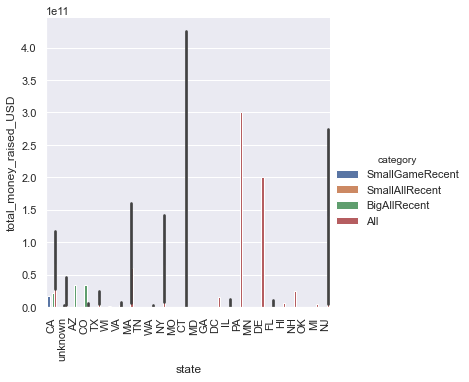

In [595]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

#company_processed=company_processed.sort_values("total_money_raised_USD",ascending=False)
plt.figure(figsize=(12,6))
sns.catplot(x="state", y="total_money_raised_USD", hue='category', data=company_processed, kind='bar')
plt.xticks( rotation=90)
plt.savefig('OUTPUT/recent.png')

plt.show()

In [549]:
plt.figure(figsize=(12,3))
filter1=(company_processed["total_money_raised_USD"]>0) & (company_processed["category_code"]=="games_video")
filter2=filter1 & (company_processed["category"].isin(["SmallGameRecent","BigGameRecent","SmallAllRecent","BigAllRecent"]))
company_processed1=company_processed[filter1]

sns.boxplot(x="state", y="total_money_raised_USD", data=company_processed1, whis="range", palette="vlag")
plt.xticks( rotation=90)
plt.savefig('OUTPUT/box.png')

/Users/silviaserafini/Library/Python/3.6/lib/python/site-packages/seaborn/categorical.py:483: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  **kws)
/Users/silviaserafini/Library/Python/3.6/lib/python/site-packages/seaborn/categorical.py:483: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  **kws)
/Users/silviaserafini/Library/Python/3.6/lib/python/site-packages/seaborn/categorical.py:483: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  **kws)
/Users/silviaserafini/Library/Python/3.6/lib/python/site-packages/seaborn/categorical.py:483: MatplotlibDeprecationWarning: Setting w

<Figure size 864x216 with 0 Axes>

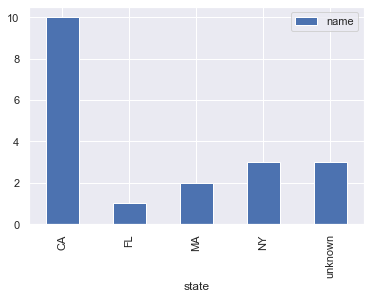

<Figure size 864x216 with 0 Axes>

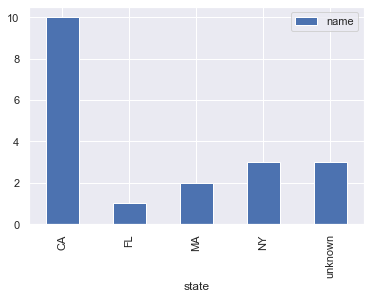

<Figure size 864x216 with 0 Axes>

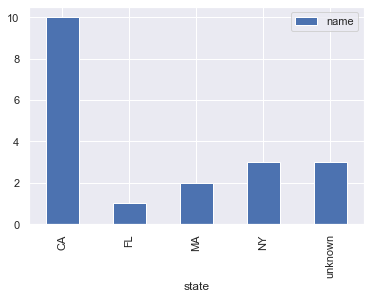

<Figure size 864x216 with 0 Axes>

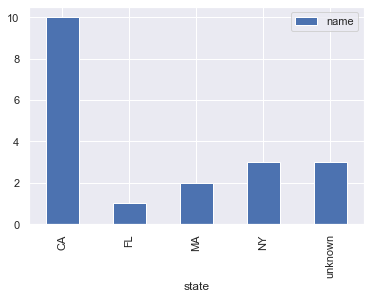

<Figure size 864x216 with 0 Axes>

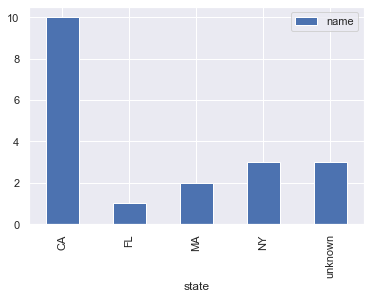

<Figure size 864x216 with 0 Axes>

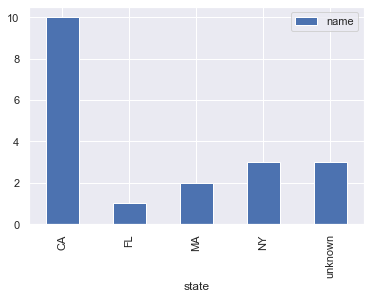

NameError: name 'title' is not defined

In [571]:
plt.figure(figsize=(12,3))
plot=company_processed1.groupby("state").agg({"name":"count"}).plot.bar()

#sns.boxplot(x="state", y="total_money_raised_USD", data=company_processed1, whis="range", palette="vlag")
plt.xticks( rotation=90)
plt.show()
title('number of tech companies')
plt.savefig('OUTPUT/num.png')

/Users/silviaserafini/Library/Python/3.6/lib/python/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 432x288 with 0 Axes>

<Figure size 864x216 with 0 Axes>

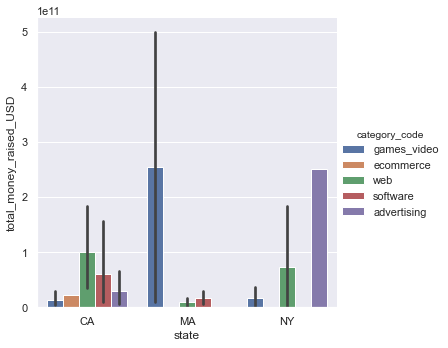

<Figure size 864x216 with 0 Axes>

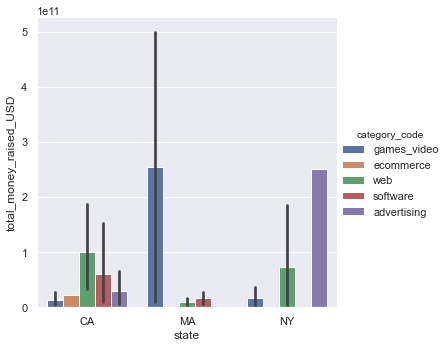

In [554]:
plt.figure(figsize=(12,3))
df=company_processed[company_processed["state"].isin(["MA","CA","NY"])]
df["category_code"].value_counts()

sns.factorplot(x="state", y="total_money_raised_USD", hue='category_code', data=df, kind='bar')
plt.savefig('OUTPUT/money.png')
plt.show()

# Design companies

In [23]:
df=df[["offices","name","category_code","total_money_raised"]]

In [25]:
df.iloc[0,0]

{'address1': '447 Battery St.',
 'address2': '3rd Floor',
 'city': 'San Francisco',
 'country_code': 'USA',
 'description': 'United States (HQ)',
 'latitude': 37.7955307,
 'longitude': -122.4005983,
 'state_code': 'CA',
 'zip_code': '94111'}

In [31]:
df=pd.DataFrame(list(db.companies.find({"category_code":"design"})))
df=df.explode("offices")
def getCounrty(x):
    try:
        return x["country_code"]
    except:
        return"unknown"
df['country'] = df["offices"].apply(getCounrty)
df['state'] = df["offices"].apply(getState)

    
    


In [32]:
df

,_id,name,permalink,crunchbase_url,homepage_url,blog_url,blog_feed_url,twitter_username,category_code,number_of_employees,...,acquisitions,offices,milestones,ipo,video_embeds,screenshots,external_links,partners,country,state
0,52cdef7c4bab8bd675298447,99designs,99designs,http://www.crunchbase.com/company/99designs,http://99designs.com,http://99designs.com/designer-blog/,http://99designs.com/designer-blog/feed/,99designs,design,100.0,...,"[{'price_amount': None, 'price_currency_code':...","{'description': 'United States (HQ)', 'address...","[{'id': 21461, 'description': '99designs Doubl...",None,"[{'embed_code': '<iframe width=""430"" height=""2...","[{'available_sizes': [[[150, 93], 'assets/imag...",[],[],USA,CA
0,52cdef7c4bab8bd675298447,99designs,99designs,http://www.crunchbase.com/company/99designs,http://99designs.com,http://99designs.com/designer-blog/,http://99designs.com/designer-blog/feed/,99designs,design,100.0,...,"[{'price_amount': None, 'price_currency_code':...","{'description': 'Australia', 'address1': '204 ...","[{'id': 21461, 'description': '99designs Doubl...",None,"[{'embed_code': '<iframe width=""430"" height=""2...","[{'available_sizes': [[[150, 93], 'assets/imag...",[],[],AUS,None
0,52cdef7c4bab8bd675298447,99designs,99designs,http://www.crunchbase.com/company/99designs,http://99designs.com,http://99designs.com/designer-blog/,http://99designs.com/designer-blog/feed/,99designs,design,100.0,...,"[{'price_amount': None, 'price_currency_code':...","{'description': 'Europe', 'address1': 'Schlesi...","[{'id': 21461, 'description': '99designs Doubl...",None,"[{'embed_code': '<iframe width=""430"" height=""2...","[{'available_sizes': [[[150, 93], 'assets/imag...",[],[],DEU,None
1,52cdef7e4bab8bd67529ba4e,Graticle,graticle,http://www.crunchbase.com/company/graticle,http://www.graticle.com,http://www.graticle.com/blog/,,graticle,design,1.0,...,[],"{'description': 'Office', 'address1': '100 E. ...",[],None,"[{'embed_code': '<iframe width=""450"" height=""2...","[{'available_sizes': [[[150, 119], 'assets/ima...",[],[],USA,WA
2,52cdef7e4bab8bd67529bd1a,Kickstarter,kickstarter,http://www.crunchbase.com/company/kickstarter,http://www.kickstarter.com,http://www.kickstarter.com/blog,,kickstarter,design,NaN,...,[],"{'description': '', 'address1': '58 Kent St', ...","[{'id': 11001, 'description': 'The iPod Nano W...",None,"[{'embed_code': '<iframe src=""http://player.vi...","[{'available_sizes': [[[150, 91], 'assets/imag...",[{'external_url': 'http://www.facebook.com/Kic...,[],USA,NY
3,52cdef7f4bab8bd67529c47a,Moonfruit,moonfruit,http://www.crunchbase.com/company/moonfruit,http://www.Moonfruit.com,,,moonfruit,design,NaN,...,[],"{'description': 'UK Office', 'address1': '', '...","[{'id': 28140, 'description': 'Moonfruit exits...",None,[],[],[{'external_url': 'http://www.sitebuilderrepor...,[],GBR,None


# Web scraping of the 30 best USA design companies

In [35]:
from bs4 import BeautifulSoup
import requests
url="https://upcity.com/local-marketing-agencies/lists/top-web-design-agencies-united-states"
res=requests.get(url)
soup = BeautifulSoup(res.text)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [38]:
#class="sc-AykKC sc-AykKD Flex__FlexBase-sc-1ob280e-0 Flex___StyledFlexBase-sc-1ob280e-1 iECZgt ProfileList___StyledFlex-jocsho-3 hfxDgE"
result=soup.select("div .sc-AykKC.sc-AykKD.Flex__FlexBase-sc-1ob280e-0.Flex___StyledFlexBase-sc-1ob280e-1.iECZgt.ProfileList___StyledFlex-jocsho-3.hfxDgE")

In [74]:
agencyList=[]
#result[1].select("a h3")[0].get_text()
for r in result:
    agencyList.append(r.select("a h3")[0].get_text())

In [75]:
agencyList

['WebFX',
 'Vivial',
 'Avail Consultants',
 'SmartSites 💡 Digital Marketing Agency',
 'M16 Marketing',
 'Disruptive Advertising',
 'Fair Marketing Inc',
 'Insignia SEO & Web Design',
 'Kobe Digital',
 'Legnd',
 'Coalition Technologies',
 'Thrive Internet Marketing Agency',
 'The Media Captain',
 'Regex SEO',
 'Ignite Visibility',
 'JSL Marketing & Web Design',
 'NuStream Marketing',
 'Lounge Lizard',
 'KitelyTech ',
 'Ignite Media Group',
 'V Digital Services',
 '71Three',
 'Neon Ambition',
 'Knowmad Digital Marketing',
 'KickStart Dental Marketing',
 'Black Bear Design',
 'iLocal, Inc.',
 'GoingClear Interactive',
 'CSTMR Fintech Marketing & Design ',
 'SPINX Digital']

In [227]:
'''import json
dfDesign=pd.DataFrame()
i=0
for n in agencyList:
    param=''
    i+=1
    n=n.split()
    for w in n:
        param=param+w+'+'
    param=param[:-1].lower()
    url=f"https://api.opencorporates.com/v0.4/companies/search?q={param}"
    res= requests.get(url).json()
    df=pd.DataFrame(res)
    with open('OUTPUT/data{i}.txt', 'w') as outfile:
    json.dump(data, outfile)
    pd.concat([dfDesign,df])
    '''

'import json\ndfDesign=pd.DataFrame()\ni=0\nfor n in agencyList:\n    param=\'\'\n    i+=1\n    n=n.split()\n    for w in n:\n        param=param+w+\'+\'\n    param=param[:-1].lower()\n    url=f"https://api.opencorporates.com/v0.4/companies/search?q={param}"\n    res= requests.get(url).json()\n    df=pd.DataFrame(res)\n    with open(\'OUTPUT/data{i}.txt\', \'w\') as outfile:\n    json.dump(data, outfile)\n    pd.concat([dfDesign,df])\n    '

In [220]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

def getPage(url):
    driver = webdriver.Firefox()
    driver.implicitly_wait(10) # seconds
    driver.get(url)
  
    
    element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.TAG_NAME, "div"))
    )
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    driver.quit()
    return soup


address=[]
for n in agencyList:
    param=''
    param=n.strip().replace(' ',"-").lower() 
    url=f"https://upcity.com/local-marketing-agencies/profiles/{param}"
    soup=getPage(url)
    #res=requests.get(url)
    #res=BeautifulSoup(res.text)
    res=soup.select("div .sc-AykKE.sc-AykKG.Text__TextBase-sc-11qtpo7-0.Text___StyledTextBase-sc-11qtpo7-1.ipkAtK")
    try:
        print(res[0].text.split('+')[0])
        address.append({"name":n,"address": res[0].text.split('+')[0]})
    except:
        continue
    

600 THIRD AVENUE, 2ND FLOORNEW YORK CITY, NEW YORK 10016
3100 RESEARCH BOULEVARD, 250DAYTON, OHIO 45420
203 WEST MILLBROOK ROAD STE 202RALEIGH, NORTH CAROLINA 27609
55 IVAN ALLEN JR BLVD NW SUITE 310ATLANTA, GEORGIA 30308
384 S 400 W, SUITE 200LINDON, UTAH 84042
26310 OAK RIDGE DRIVE, GS4SPRING, TEXAS 77380
 7083 HOLLYWOOD BLVDLOS ANGELES, CALIFORNIA 90028
10777 WESTHEIMER RD, SUITE 1100HOUSTON, TEXAS 77042
3750 S ROBERTSON BLVD, SUITE 200LOS ANGELES, CALIFORNIA 90232
4600 PARK SPRINGS BLVD, SUITE 100ARLINGTON, TEXAS 76017
294 E. LONG STREET, SUITE 300COLUMBUS, OHIO 43215
4801 WOODWAY DR, #275EHOUSTON, TEXAS 77056
3770 TANSY ST. , SUITE 100 SAN DIEGO, CALIFORNIA 92122
1700 MARKET ST. , SUITE #1005PHILADELPHIA, PENNSYLVANIA 19103
41 EAST 11TH STREETNEW YORK, NEW YORK 10003
1165 N. CLARK ST., 7TH FLOORCHICAGO , ILLINOIS 60610
1460 WALTON BLVD, SUITE 220ROCHESTER HILLS, MICHIGAN 48309
1201 EAST JEFFERSON STREET, SUITE 201PHOENIX, ARIZONA 85034
12808 WEST AIRPOT BLVD, SUITE 310SUGAR LAND, 

# GEOCODING to get the lat and long from the addresses

In [215]:
#use of geocode.xyz API
def geocode(address):
    res = requests.get(f"https://geocode.xyz/{address}",params={"json":1})
    data = res.json()
    print(pd.DataFrame(res))
    # Return as GeoJSON -> https://geojson.org/
    return {
        "type":"Point",
        "coordinates": [float(data["longt"]), float(data["latt"])]
    }

In [223]:
df1=pd.DataFrame(address)
df1

,name,address
0,WebFX,"600 THIRD AVENUE, 2ND FLOORNEW YORK CITY, NEW ..."
1,Vivial,"3100 RESEARCH BOULEVARD, 250DAYTON, OHIO 45420"
2,Avail Consultants,"203 WEST MILLBROOK ROAD STE 202RALEIGH, NORTH ..."
3,M16 Marketing,"55 IVAN ALLEN JR BLVD NW SUITE 310ATLANTA, GEO..."
4,Disruptive Advertising,"384 S 400 W, SUITE 200LINDON, UTAH 84042"
5,Fair Marketing Inc,"26310 OAK RIDGE DRIVE, GS4SPRING, TEXAS 77380"
6,Kobe Digital,"7083 HOLLYWOOD BLVDLOS ANGELES, CALIFORNIA 90028"
7,Legnd,"10777 WESTHEIMER RD, SUITE 1100HOUSTON, TEXAS ..."
8,Coalition Technologies,"3750 S ROBERTSON BLVD, SUITE 200LOS ANGELES, C..."
9,Thrive Internet Marketing Agency,"4600 PARK SPRINGS BLVD, SUITE 100ARLINGTON, TE..."


In [ ]:
import time
def Geoloc(x): 
        try:
            point=geocode(x)
            time.sleep(1)
            return point
        except:
            return None
        

df1["office"]=df1["address"].apply(Geoloc)

In [314]:
#Adding of the category name
#df1=pd.read_json(r'INPUT/designCompanies.json')

df1.columns = ['name', 'address','office','latitude','longitude']
df1["category_code"]="design"
df1.head()

,name,address,office,latitude,longitude,category_code
0,WebFX,"600 THIRD AVENUE, 2ND FLOORNEW YORK CITY, NEW ...","{'type': 'Point', 'coordinates': [-73.97629, 4...",40.74824,-73.97629,design
1,Vivial,"3100 RESEARCH BOULEVARD, 250DAYTON, OHIO 45420","{'type': 'Point', 'coordinates': [-84.11117, 3...",39.71532,-84.11117,design
2,Avail Consultants,"203 WEST MILLBROOK ROAD STE 202RALEIGH, NORTH ...","{'type': 'Point', 'coordinates': [-78.63957, 3...",35.85564,-78.63957,design
3,M16 Marketing,"55 IVAN ALLEN JR BLVD NW SUITE 310ATLANTA, GEO...","{'type': 'Point', 'coordinates': [-84.38995, 3...",33.76507,-84.38995,design
4,Disruptive Advertising,"384 S 400 W, SUITE 200LINDON, UTAH 84042",None,NaN,NaN,design


In [315]:

#save the database as jsonto visualize the results on tableau
df1.to_json("INPUT/designCompanies.json",orient="records")

# Zomato Api call, to locate vegan restaurants and Starbucks in LA

In [244]:
apiKey = os.getenv("APIKEYZOMATO")
print("WE HAVE APIKEY") if apiKey else print("NO APIKEY FOUND")

headers = {
    'Accept': 'application/json',
    'user-key': apiKey,
}

params = (
    ("entity_id","281"),    
    ("q","vegan"),
    ('city_id', '281'),
    ('lat', '34.10'),  
    ('lon', '-118.3'),
    ("radius","2000"),
    ("cuisines","308")
)

response = requests.get('https://developers.zomato.com/api/v2.1/search', headers=headers, params=params)
res=response.json()

WE HAVE APIKEY


In [340]:
#adding of the office, category code, latitude and longitude column for this db
#df2=pd.read_json(r'INPUT/VeganRestourants.json')

df2d=df2.to_dict()
df2=pd.DataFrame(df2d["restaurant"])
df2=df2.T


df2["location"][0]

{'address': '2903 Rowena Avenue 90039',
 'city': 'Los Angeles',
 'city_id': 281,
 'country_id': 216,
 'latitude': '34.1084300000',
 'locality': 'Rowena Avenue, Los Feliz',
 'locality_verbose': 'Rowena Avenue, Los Feliz, Los Angeles',
 'longitude': '-118.2682300000',
 'zipcode': '90039'}

In [357]:
def easyLatLng(row):
    of = row.location
    try:
        return {
            "latitude":of["latitude"],
            "longitude":of["longitude"]
        }
    except:
        return None

df2 = pd.concat([df2, df2.apply(easyLatLng,axis=1, result_type="expand")], axis=1)



In [ ]:
def geocode1(location):
    address=location["address"]
    res = requests.get(f"https://geocode.xyz/{address}",params={"json":1})
    data = res.json()
    print(pd.DataFrame(res))
    # Return as GeoJSON -> https://geojson.org/
    try:
        return {
        "type":"Point",
        "coordinates": [float(data["longt"]), float(data["latt"])]
        }
    except:
        return None
df2['office']=df2["location"].apply(geocode1)


In [ ]:
df2["category_code"]="VeganRest"

In [377]:
df2.to_json("INPUT/VeganRestourants.json",orient="records")

In [ ]:
#call to the same api to find all the starbucks in Los Angeles

In [388]:
apiKey = os.getenv("APIKEYZOMATO")
print("WE HAVE APIKEY") if apiKey else print("NO APIKEY FOUND")

headers = {
    'Accept': 'application/json',
    'user-key': apiKey,
}

params = (
    ('entity_id', '281'),
    ('entity_type', 'city'),
    ('q', 'starbucks'),
    ('lat', '34.10'),
    ('lon', '-118.3'),
    ('radius', '2000'),
    ('cuisines', '30,161'),
    ('sort', 'real_distance'),
    ('order', 'asc'),
)

response = requests.get('https://developers.zomato.com/api/v2.1/search', headers=headers, params=params)
resp=response.json()


WE HAVE APIKEY


In [411]:
#df3=pd.read_json(r'INPUT/Starbucks.json')

df3=pd.DataFrame(resp["restaurants"])
ddf3=df3.to_dict()
df3=pd.DataFrame(ddf3["restaurant"])
df3=df3.T

In [ ]:
df3 = pd.concat([df3, df3.apply(easyLatLng,axis=1, result_type="expand")], axis=1)
df3['office']=df3["location"].apply(geocode1)
df3["category_code"]="Starbucks"

In [415]:
df3.to_json("INPUT/Starbucks.json",orient="records")


# looking for parties near beverly hills

In [578]:
#callt
load_dotenv()
apiKey = os.getenv("APIKEYTICKETMASTER")
print("WE HAVE APIKEY") if apiKey else print("NO APIKEY FOUND")

params = (
    ('apikey', f'{apiKey}'),
    ("latlong","34.063371824427016,-118.28428"),
    ("radius","2"),
    ("unit","km"),
    ("city","los angeles,beverly hills"),
    ("locale","*")
)

response = requests.get('https://app.ticketmaster.com/discovery/v2/events.json', params=params)
res=response.json()
res


WE HAVE APIKEY


{'_embedded': {'events': [{'_embedded': {'attractions': [{'_links': {'self': {'href': '/discovery/v2/attractions/K8vZ9175J30?locale=en-us'}},
       'classifications': [{'family': False,
         'genre': {'id': 'KnvZfZ7vAeA', 'name': 'Rock'},
         'primary': True,
         'segment': {'id': 'KZFzniwnSyZfZ7v7nJ', 'name': 'Music'},
         'subGenre': {'id': 'KZazBEonSMnZfZ7v6dt', 'name': 'Alternative Rock'},
         'subType': {'id': 'KZFzBErXgnZfZ7v7lJ', 'name': 'Undefined'},
         'type': {'id': 'KZAyXgnZfZ7v7nI', 'name': 'Undefined'}}],
       'externalLinks': {'facebook': [{'url': 'https://www.facebook.com/SnowPatrol'}],
        'homepage': [{'url': 'http://www.snowpatrol.com/'},
         {'url': 'http://snowpatrol.nl/'}],
        'lastfm': [{'url': 'http://www.last.fm/music/Snow+Patrol'}],
        'musicbrainz': [{'id': 'a66999a7-ae5c-460e-ba94-1a01143ae847'}],
        'twitter': [{'url': 'https://twitter.com/SnowPatrolBand'}],
        'wiki': [{'url': 'https://en.wikiped

In [374]:
df4.columns

Index(['name', 'type', 'id', 'test', 'url', 'locale', 'images', 'sales',
       'dates', 'classifications', 'promoter', 'promoters', 'info',
       'pleaseNote', 'priceRanges', 'products', 'seatmap', 'ticketLimit',
       'ageRestrictions', '_links', '_embedded'],
      dtype='object')

In [591]:
df4=pd.DataFrame(res["_embedded"]["events"])

,name,type,id,test,url,locale,images,distance,units,sales,...,classifications,promoter,promoters,info,priceRanges,seatmap,ticketLimit,ageRestrictions,_links,_embedded
0,Snow Patrol Acoustic Tour,event,vv1AaZA-xGkdgkk5s,False,https://www.ticketmaster.com/snow-patrol-acous...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",0.97,KILOMETERS,{'public': {'startDateTime': '2020-03-13T17:00...,...,"[{'primary': True, 'segment': {'id': 'KZFzniwn...","{'id': '653', 'name': 'LIVE NATION MUSIC', 'de...","[{'id': '653', 'name': 'LIVE NATION MUSIC', 'd...",PARKING INFORMATION: *UTLA Parking Lot - ( A L...,"[{'type': 'standard', 'currency': 'USD', 'min'...",{'staticUrl': 'https://maps.ticketmaster.com/m...,{'info': 'There is an overall 4 ticket limit f...,{'legalAgeEnforced': False},{'self': {'href': '/discovery/v2/events/vv1AaZ...,{'venues': [{'name': 'The Cathedral Sanctuary ...
1,Snow Patrol Acoustic Tour,event,vv1AaZA-xGkdPk4tK,False,https://www.ticketmaster.com/snow-patrol-acous...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",0.97,KILOMETERS,{'public': {'startDateTime': '2020-03-13T17:00...,...,"[{'primary': True, 'segment': {'id': 'KZFzniwn...","{'id': '653', 'name': 'LIVE NATION MUSIC', 'de...","[{'id': '653', 'name': 'LIVE NATION MUSIC', 'd...",PARKING INFORMATION: *UTLA Parking Lot - ( A L...,"[{'type': 'standard', 'currency': 'USD', 'min'...",{'staticUrl': 'https://maps.ticketmaster.com/m...,{'info': 'There is an overall 4 ticket limit f...,{'legalAgeEnforced': False},{'self': {'href': '/discovery/v2/events/vv1AaZ...,{'venues': [{'name': 'The Cathedral Sanctuary ...
2,Netflix Is A Joke Fest Presents: Taylor Tomlinson,event,vv1AaZA-0GkdZJ4Av,False,http://dynastytypewriter.com/calendar/taylorto...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",0.45,KILOMETERS,{'public': {'startDateTime': '2020-03-06T18:00...,...,"[{'primary': True, 'segment': {'id': 'KZFzniwn...","{'id': '653', 'name': 'LIVE NATION MUSIC', 'de...","[{'id': '653', 'name': 'LIVE NATION MUSIC', 'd...",NaN,NaN,NaN,NaN,{'legalAgeEnforced': False},{'self': {'href': '/discovery/v2/events/vv1AaZ...,{'venues': [{'name': 'Dynasty Typewriter at th...
3,Passenger,event,vv16aZAOMPUZACAdFF,False,https://www.ticketmaster.com/passenger-los-ang...,en-us,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...",0.97,KILOMETERS,{'public': {'startDateTime': '2020-01-31T18:00...,...,"[{'primary': True, 'segment': {'id': 'KZFzniwn...","{'id': '653', 'name': 'LIVE NATION MUSIC', 'de...","[{'id': '653', 'name': 'LIVE NATION MUSIC', 'd...",PARKING INFORMATION: *UTLA Parking Lot - ( A L...,"[{'type': 'standard', 'currency': 'USD', 'min'...",{'staticUrl': 'https://s1.ticketm.net/tmimages...,{'info': 'There is an overall 4 ticket limit f...,{'legalAgeEnforced': False},{'self': {'href': '/discovery/v2/events/vv16aZ...,{'venues': [{'name': 'The Cathedral Sanctuary ...
4,Netflix Is A Joke Fest Presents: Catherine Cohen,event,vv1AaZA-0GkeWTfMr,False,http://dynastytypewriter.com/calendar/catcohen...,en-us,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...",0.45,KILOMETERS,{'public': {'startDateTime': '2020-03-06T18:00...,...,"[{'primary': True, 'segment': {'id': 'KZFzniwn...","{'id': '653', 'name': 'LIVE NATION MUSIC', 'de...","[{'id': '653', 'name': 'LIVE NATION MUSIC', 'd...",NaN,NaN,NaN,NaN,{'legalAgeEnforced': False},{'self': {'href': '/discovery/v2/events/vv1AaZ...,{'venues': [{'name': 'Dynasty Typewriter at th...
5,Netflix Is A Joke Fest Presents: London Hughes,event,vv1AaZA-0GkeXrVzQ,False,http://dynastytypewriter.com/calendar/londonhu...,en-us,"[{'ratio': '4_3', 'url': 'https://s1.ticketm.n...",0.45,KILOMETERS,{'public': {'startDateTime': '2020-03-06T18:00...,...,"[{'primary': True, 'segment': {'id': 'KZFzniwn...","{'id': '653', 'name': 'LIVE NATION MUSIC', 'de...","[{'id': '653', 'name': 'LIVE NATION MUSIC', 'd...",NaN,NaN,NaN,NaN,{'legalAgeEnforced': False},{'self': {'href': '/discovery/v2/events/vv1AaZ...,{'venues': [{'name': 'Dynasty Typewriter at th...
6,Netf

In [592]:

df4.to_json("INPUT/Events.json",orient="records")


In [ ]:
#building of a global databases, with all the locations with 3 infos: name, category, coordinates(geopoint),lat,long

# AIRPORT api call

In [422]:
load_dotenv()
apiKey = os.getenv("APIKEYAIR")
print("WE HAVE APIKEY") if apiKey else print("NO APIKEY FOUND")

url = "https://forteweb-airportguide-airport-basic-info-v1.p.rapidapi.com/airports_nearby"

querystring = {"miles":"5","lat":"34.052235","lng":"-118.243683"}

headers = {
    'x-rapidapi-host': "forteweb-airportguide-airport-basic-info-v1.p.rapidapi.com",
    'x-rapidapi-key': apiKey
    }

response = requests.request("GET", url, headers=headers, params=querystring)
res=response.json()



WE HAVE APIKEY


In [449]:
df5=pd.DataFrame(res['airport_list'])
df5["latitude"]=df5["lat_map"]
df5["longitude"]=df5["lon_map"]
df5.drop(["lat_map","lon_map"],axis=1)


,local_id,icao_id,iata_id,name,type,city,lat_format,lon_format,country_code,country,state_abbrev,state,gmt,elevation,magnetic_variation,distance,Commercial airports only,link,latitude,longitude
0,LAX,KLAX,LAX,Los Angeles International Airport,Airport,Los Angeles,33&deg;56&#39;32.9800&#92;&#34;N,118&deg;24&#39;28.9700&#92;&#34;W,US,United States,CA,California,-8.0,127.7,12E,0,1,https://airportguide.com/airport/info/LAX,33.942494,-118.408047
1,CN33,,,Airport Imperial Bldg Helistop Heliport,Heliport,El Segundo,33&deg;55&#39;49.3500&#92;&#34;N,118&deg;23&#39;48.8200&#92;&#34;W,US,United States,CA,California,-8.0,238.0,14E,1.05,0,https://airportguide.com/airport/info/CN33,33.930375,-118.396894
2,CL02,,,Kilroy Center Heliport,Heliport,El Segundo,33&deg;55&#39;47.5300&#92;&#34;N,118&deg;23&#39;06.0300&#92;&#34;W,US,United States,CA,California,-8.0,255.0,14E,1.58,0,https://airportguide.com/airport/info/CL02,33.929869,-118.385008
3,32CN,,,Pacific Bell-2300 Imperial Hwy Heliport,Heliport,El Segundo,33&deg;55&#39;49.5600&#92;&#34;N,118&deg;22&#39;57.1500&#92;&#34;W,US,United States,CA,California,-8.0,209.0,14E,1.68,0,https://airportguide.com/airport/info/32CN,33.930433,-118.382542
4,CL71,,,Hughes/Corporate Heliport,Heliport,Los Angeles,33&deg;57&#39;58.2000&#92;&#34;N,118&deg;25&#39;29.1000&#92;&#34;W,US,United States,CA,California,-8.0,75.0,14E,1.89,0,https://airportguide.com/airport/info/CL71,33.966167,-118.424750
5,CL03,,,Airport Towers Nr 1 Heliport,Heliport,El Segundo,33&deg;55&#39;00.8000&#92;&#34;N,118&deg;23&#39;41.6000&#92;&#34;W,US,United States,CA,California,-8.0,404.0,14E,1.92,0,https://airportguide.com/airport/info/CL03,33.916889,-118.394889
6,4CA6,,,Chevron Refinery Heliport,Heliport,El Segundo,33&deg;54&#39;52.0900&#92;&#34;N,118&deg;25&#39;37.9900&#92;&#34;W,US,United States,CA,California,-8.0,29.0,14E,2.23,0,https://airportguide.com/airport/info/4CA6,33.914469,-118.427219
7,CA79,,,The Ritz-Carlton Hotel Company Heliport,Heliport,Marina Del Rey,33&deg;59&#39;04.0410&#92;&#34;N,118&deg;27&#39;00.2830&#92;&#34;W,US,United States,CA,California,-8.0,149.0,14E,3.77,0,https://airportguide.com/airport/info/CA79,33.984456,-118.450079
8,HHR,KHHR,HHR,Jack Northrop Field/Hawthorne Municipal Airport,Airport,Hawthorne,33&deg;55&#39;22.2230&#92;&#34;N,118&deg;20&#39;06.6740&#92;&#34;W,US,United States,CA,California,-8.0,65.5,14E,4.39,0,https://airportguide.com/airport/info/HHR,33.922840,-118.335187


In [450]:

df5["office"]=df5["longitude"]+'_'+ df5["latitude"]

In [452]:
def toGeopoint(x):
    coord=x.split('_')
    return  {
        "type":"Point",
        "coordinates": [float(coord[0]),float(coord[1])]
        }
df5["office"]=df5["office"].apply(toGeopoint)
df5

,local_id,icao_id,iata_id,name,type,city,lat_format,lon_format,lat_map,lon_map,...,state,gmt,elevation,magnetic_variation,distance,Commercial airports only,link,latitude,longitude,office
0,LAX,KLAX,LAX,Los Angeles International Airport,Airport,Los Angeles,33&deg;56&#39;32.9800&#92;&#34;N,118&deg;24&#39;28.9700&#92;&#34;W,33.942494,-118.408047,...,California,-8.0,127.7,12E,0,1,https://airportguide.com/airport/info/LAX,33.942494,-118.408047,"{'type': 'Point', 'coordinates': [-118.408047,..."
1,CN33,,,Airport Imperial Bldg Helistop Heliport,Heliport,El Segundo,33&deg;55&#39;49.3500&#92;&#34;N,118&deg;23&#39;48.8200&#92;&#34;W,33.930375,-118.396894,...,California,-8.0,238.0,14E,1.05,0,https://airportguide.com/airport/info/CN33,33.930375,-118.396894,"{'type': 'Point', 'coordinates': [-118.396894,..."
2,CL02,,,Kilroy Center Heliport,Heliport,El Segundo,33&deg;55&#39;47.5300&#92;&#34;N,118&deg;23&#39;06.0300&#92;&#34;W,33.929869,-118.385008,...,California,-8.0,255.0,14E,1.58,0,https://airportguide.com/airport/info/CL02,33.929869,-118.385008,"{'type': 'Point', 'coordinates': [-118.385008,..."
3,32CN,,,Pacific Bell-2300 Imperial Hwy Heliport,Heliport,El Segundo,33&deg;55&#39;49.5600&#92;&#34;N,118&deg;22&#39;57.1500&#92;&#34;W,33.930433,-118.382542,...,California,-8.0,209.0,14E,1.68,0,https://airportguide.com/airport/info/32CN,33.930433,-118.382542,"{'type': 'Point', 'coordinates': [-118.382542,..."
4,CL71,,,Hughes/Corporate Heliport,Heliport,Los Angeles,33&deg;57&#39;58.2000&#92;&#34;N,118&deg;25&#39;29.1000&#92;&#34;W,33.966167,-118.424750,...,California,-8.0,75.0,14E,1.89,0,https://airportguide.com/airport/info/CL71,33.966167,-118.424750,"{'type': 'Point', 'coordinates': [-118.42475, ..."
5,CL03,,,Airport Towers Nr 1 Heliport,Heliport,El Segundo,33&deg;55&#39;00.8000&#92;&#34;N,118&deg;23&#39;41.6000&#92;&#34;W,33.916889,-118.394889,...,California,-8.0,404.0,14E,1.92,0,https://airportguide.com/airport/info/CL03,33.916889,-118.394889,"{'type': 'Point', 'coordinates': [-118.394889,..."
6,4CA6,,,Chevron Refinery Heliport,Heliport,El Segundo,33&deg;54&#39;52.0900&#92;&#34;N,118&deg;25&#39;37.9900&#92;&#34;W,33.914469,-118.427219,...,California,-8.0,29.0,14E,2.23,0,https://airportguide.com/airport/info/4CA6,33.914469,-118.427219,"{'type': 'Point', 'coordinates': [-118.427219,..."
7,CA79,,,The Ritz-Carlton Hotel Company Heliport,Heliport,Marina Del Rey,33&deg;59&#39;04.0410&#92;&#34;N,118&deg;27&#39;00.2830&#92;&#34;W,33.984456,-118.450079,...,California,-8.0,149.0,14E,3.77,0,https://airportguide.com/airport/info/CA79,33.984456,-118.450079,"{'type': 'Point', 'coordinates': [-118.450079,..."
8,HHR,KHHR,HHR,Jack Northrop Field/Hawthorne Municipal Airport,Airport,Hawthorne,33&deg;55&#39;22.2230&#92;&#34;N,118&deg;20&#39;06.6740&#92;&#34;W,33.922840,-118.335187,...,California,-8.0,65.5,14E,4.39,0,https://airportguide.com/airport/info/HHR,33.922840,-118.335187,"{'type': 'Point', 'coordinates': [-118.335187,..."


In [453]:
df5['category_code']="airport"

In [454]:
df5.to_json("INPUT/Airports.json",orient="records")

# Last cleaning operations and dropping of places not in CA

In [585]:
#import the data 
Starbucks=pd.read_json("INPUT/Starbucks.json")
Veg=pd.read_json("INPUT/VeganRestourants.json")
Comp=pd.read_json("INPUT/companies_clean.json")
Design=pd.read_json("INPUT/designCompanies.json")
Airports=pd.read_json("INPUT/Airports.json")
BigComp=pd.read_json("INPUT/alltot_processed.json")

In [586]:
# last cleaning and standardizing operations, checking if the different categories are in to Los Angeles Area
import re
# Drop design companies not in Los Angeles
filter2= Design["address"].str.contains("ANGELES",case=True, regex=True)  
Design=Design[filter2]

#manual mistake corrections of latitude and longitude columns for the differents databases
Design.iloc[1,3]=34.026620
Design.iloc[1,4]=-118.390100
Design.iloc[2,3]=34.037130
Design.iloc[2,4]=-118.277980

Design["latlon"]=Design["longitude"].astype(str)+ '_' + Design["latitude"].astype(str)
Starbucks["latlon"]=Starbucks["longitude"].astype(str)+ '_' + Starbucks["latitude"].astype(str)
Veg["latlon"]=Veg["longitude"].astype(str)+ '_' + Veg["latitude"].astype(str)

def clean1(x):
    latlon=x.split("_")
    res={"type":"Point","coordinates":[float(latlon[0]),float(latlon[1])]}
    return res

Design["office"]=Design["latlon"].apply(clean1)
Starbucks["office"]=Starbucks["latlon"].apply(clean1)
Veg["office"]=Veg["latlon"].apply(clean1)

def clean(x):
    x["coordinates"][0]=float(x["coordinates"][0])
    x["coordinates"][1]=float(x["coordinates"][1])
    return x

Airports["office"]=Airports["office"].apply(clean)



In [587]:
#cleaning of the Comp2 dataframe, and filtering for only companies in Los Angeles
Comp2=Comp[['name', 'category_code','total_money_raised', 'offices', 'category', 'office', 'clean_state']]
Comp2=pd.concat([Comp2,BigComp])

def long(x):
    try:
        return x["coordinates"][0]
    except:
        return None
def lat(x):
    try:
        return x["coordinates"][1]
    except:
        return None

Comp2["latitude"]=Comp2["office"].apply(lat)
Comp2["longitude"]=Comp2["office"].apply(long)

Comp2 = Comp2.dropna(subset=("latitude","longitude"), how='all')
Comp2['category']=Comp2['category_code']
Comp2['category_code']="company"

def getState(x):
    try:
        return x["state_code"]
    except:
        return"unknown"
Comp2['state'] = Comp2["offices"].apply(getState)
Comp2=Comp2[Comp2['state']=="CA"]


In [588]:
#Comp1 includes only the recent companies
filter1=((Comp["category"]=="BigAllRecent")|(Comp["category"]=="SmallGameRecent" )|(Comp["category"]=="SmallAllRecent"))&(Comp["state"]=="CA") 
CompRecent=Comp[filter1]
CompRecent=CompRecent[1:3]
CompRecent.to_json("INPUT/Comp11.json",orient="records")

In [ ]:
#Creation of the overall database for final plotting
dbTot=pd.concat([Starbucks[["latitude","longitude",'category_code']], Veg[["latitude","longitude",'category_code']],Comp2[["latitude","longitude",'category_code']],Design[["latitude","longitude",'category_code']],Airports[["latitude","longitude",'category_code']]])

#export the 6 db
Starbucks.to_json("INPUT/Starbucks1.json",orient="records")
Veg.to_json("INPUT/Veg1.json",orient="records")
Comp2.to_json("INPUT/Comp1.json",orient="records")
Design.to_json("INPUT/Design1.json",orient="records")
Airports.to_json("INPUT/Airports1.json",orient="records")
dbTot.to_json("INPUT/dbTot1.json",orient="records")
CompRecent.to_json("INPUT/Comp11.json",orient="records")